In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string


In [65]:
df = pd.read_csv(r'C:\Users\archa\Downloads\Compressed\archive_3\Language Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [66]:
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
    text = text.lower()
    return(text)
    

In [67]:
df['Text'] = df['Text'].apply(remove_pun)

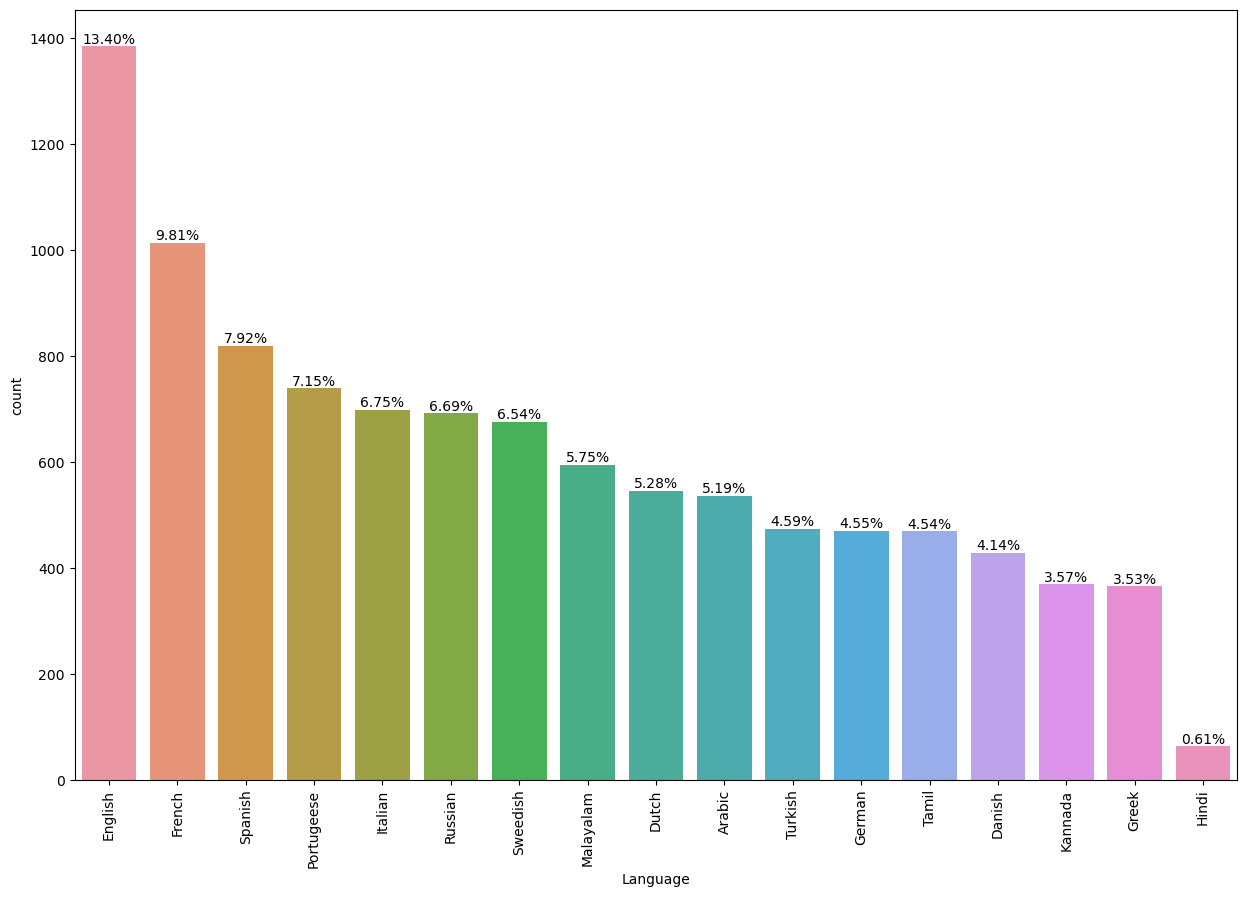

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `df` is your DataFrame containing the "Language" column

# Create the count plot
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x="Language", order=df["Language"].value_counts().index)
plt.xticks(rotation=90)

# Calculate the percentages
total_count = len(df)
language_counts = df["Language"].value_counts()
percentages = (language_counts / total_count) * 100

# Add percentage labels on top of the bars
for index, value in enumerate(language_counts):
    plt.text(index, value, f"{percentages[index]:.2f}%", ha="center", va="bottom")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

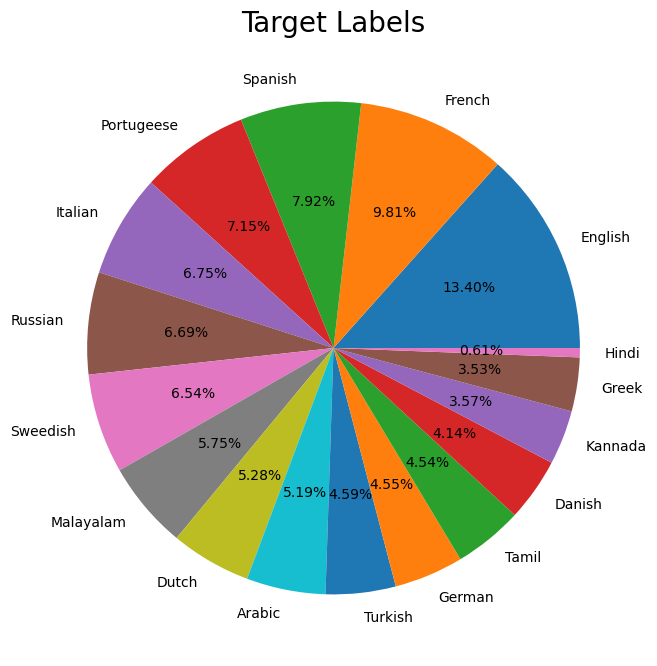

In [69]:
plt.figure(figsize=(8,8))
plt.pie(x = df['Language'].value_counts() ,autopct='%1.2f%%' ,labels=df['Language'].value_counts().index)
plt.title('Target Labels',fontsize=20)
plt.show

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.iloc[:, 0]
Y = df.iloc[:, 1]

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [73]:
from sklearn import feature_extraction

In [74]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer = 'char')

In [75]:
from sklearn import pipeline
from sklearn import linear_model

In [76]:
model_pipe = pipeline.Pipeline([('vec', vec),('clf',linear_model.LogisticRegression())])

In [77]:
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [78]:
model_pipe.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [79]:
predict_Val = model_pipe.predict(X_test)

In [80]:
from sklearn import metrics

In [81]:
metrics.accuracy_score(Y_test,predict_Val) * 100

97.58220502901354

In [82]:
metrics.confusion_matrix(Y_test, predict_Val)

array([[111,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  77,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   0,   1],
       [  0,   2,  86,   3,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 271,   1,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1, 207,   1,   0,   0,   3,   0,   0,   0,   0,
          2,   0,   0,   1],
       [  0,   0,   1,   0,   3,  82,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,  71,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 131,   0,   0,   1,   0,
          2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  80,   0,   0,   0,
         

In [83]:
model_pipe.predict(['My name is Charan'])

array(['English'], dtype=object)

In [84]:
import pickle
new_file = open('model.pckl', 'wb')
pickle.dump(model_pipe, new_file)
new_file.close()